In [2]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [50]:
# Windows 용 한글 폰트 오류 해결
from matplotlib import font_manager,rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)

In [6]:
df = pd.read_excel('1-9호선 통합본(중복 제거).xlsx')

In [8]:
df

,Unnamed: 0,역명,노선명,mean,max,min,노선개수,대합실면적,승강장면적,지하상가 개수,역내편의점 개수,화장실개수,에스컬레이터 대수,엘리베이터 대수,자전거보관소 대수,물품보관함 개수,소화기 대수,스마트도서관 개수
0,0,동대문,1호선,23812,35181,16032,2,3400.0,2090.0,1.0,0,1.0,1.0,1.0,30,25.0,47,0
1,1,동묘앞,1호선,21015,37417,12384,2,5700.0,4194.0,1.0,0,4.0,12.0,12.0,6,9.0,43,0
2,2,서울역,1호선,105211,139845,65919,2,8725.0,2080.0,1.0,0,1.0,5.0,5.0,10,64.0,NaN,0
3,3,시청,1호선,49914,74556,17937,2,6863.0,3784.0,6.0,0,1.0,3.0,3.0,25,44.0,68,1
4,4,신설동,1호선,26842,37009,9983,2,4164.0,3076.0,NaN,0,1.0,NaN,NaN,66,9.0,46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,308,종합운동장,9호선,9845,15620,2730,2,NaN,NaN,2.0,1,2.0,18.0,6.0,20,NaN,35,0
309,309,중앙보훈병원,9호선,20851,29135,5508,1,NaN,NaN,1.0,1,1.0,10.0,5.0,210,9.0,-,1
310,310,증미,9호선,14372,20485,3537,1,NaN,NaN,NaN,1,1.0,18.0,3.0,30,NaN,66,0
311,311,한성백제,9호선,5735,14163,1628,1,NaN,NaN,NaN,1,1.0,10.0,3.0,200,9.0,-,0


In [12]:
df = df.drop(columns = "Unnamed: 0")

In [14]:
df

,역명,노선명,mean,max,min,노선개수,대합실면적,승강장면적,지하상가 개수,역내편의점 개수,화장실개수,에스컬레이터 대수,엘리베이터 대수,자전거보관소 대수,물품보관함 개수,소화기 대수,스마트도서관 개수
0,동대문,1호선,23812,35181,16032,2,3400.0,2090.0,1.0,0,1.0,1.0,1.0,30,25.0,47,0
1,동묘앞,1호선,21015,37417,12384,2,5700.0,4194.0,1.0,0,4.0,12.0,12.0,6,9.0,43,0
2,서울역,1호선,105211,139845,65919,2,8725.0,2080.0,1.0,0,1.0,5.0,5.0,10,64.0,NaN,0
3,시청,1호선,49914,74556,17937,2,6863.0,3784.0,6.0,0,1.0,3.0,3.0,25,44.0,68,1
4,신설동,1호선,26842,37009,9983,2,4164.0,3076.0,NaN,0,1.0,NaN,NaN,66,9.0,46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,종합운동장,9호선,9845,15620,2730,2,NaN,NaN,2.0,1,2.0,18.0,6.0,20,NaN,35,0
309,중앙보훈병원,9호선,20851,29135,5508,1,NaN,NaN,1.0,1,1.0,10.0,5.0,210,9.0,-,1
310,증미,9호선,14372,20485,3537,1,NaN,NaN,NaN,1,1.0,18.0,3.0,30,NaN,66,0
311,한성백제,9호선,5735,14163,1628,1,NaN,NaN,NaN,1,1.0,10.0,3.0,200,9.0,-,0


In [16]:
df.columns

Index(['역명', '노선명', 'mean', 'max', 'min', '노선개수', '대합실면적', '승강장면적', '지하상가 개수',
       '역내편의점 개수', '화장실개수', '에스컬레이터 대수', '엘리베이터 대수', '자전거보관소 대수', '물품보관함 개수',
       '소화기 대수', '스마트도서관 개수'],
      dtype='object')

In [64]:
df["역면적"] = df["대합실면적"]+df["승강장면적"]

In [36]:
df["편의시설물개수"] = df["지하상가 개수"]+df["역내편의점 개수"]+df["화장실개수"]+df["에스컬레이터 대수"]+df["엘리베이터 대수"]+ df["자전거보관소 대수"] 
+ df["물품보관함 개수"]  + df["스마트도서관 개수"]

0      25.0
1       9.0
2      64.0
3      45.0
4       9.0
       ... 
308     NaN
309    10.0
310     NaN
311     9.0
312     NaN
Length: 313, dtype: float64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   역명         313 non-null    object 
 1   노선명        313 non-null    object 
 2   mean       313 non-null    int64  
 3   max        313 non-null    int64  
 4   min        313 non-null    int64  
 5   노선개수       313 non-null    int64  
 6   대합실면적      274 non-null    float64
 7   승강장면적      274 non-null    float64
 8   지하상가 개수    206 non-null    float64
 9   역내편의점 개수   313 non-null    int64  
 10  화장실개수      303 non-null    float64
 11  에스컬레이터 대수  288 non-null    float64
 12  엘리베이터 대수   288 non-null    float64
 13  자전거보관소 대수  313 non-null    int64  
 14  물품보관함 개수   258 non-null    float64
 15  소화기 대수     302 non-null    object 
 16  스마트도서관 개수  313 non-null    int64  
 17  편의시설물개수    194 non-null    float64
dtypes: float64(8), int64(7), object(3)
memory usage: 44.1+ KB


In [56]:
df = df.rename(columns = {"mean" : "평균이용객수"})

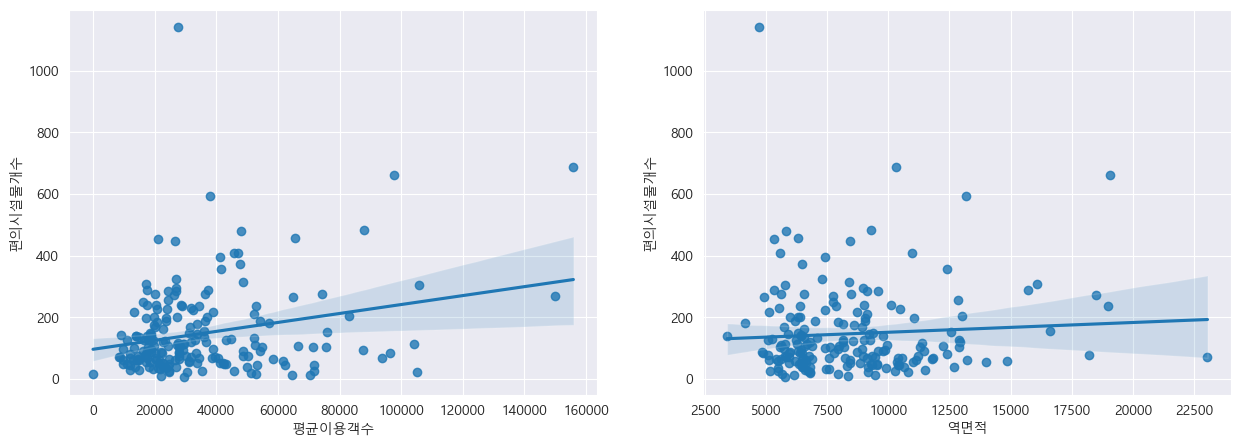

In [68]:
# 스타일 테마 설정
# sns.set_style("darkgrid")

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 선형회귀선 표시
sns.regplot(x = "평균이용객수", # x축변수
            y = "편의시설물개수", # y축변수
            data = df, # 데이터
            ax = ax1) # axe 객체 - 1번째 그래프

# 선형회귀선 미표시
sns.regplot(x = "역면적",  
            y = "편의시설물개수", 
            data = df, 
            ax = ax2)
plt.savefig("./평균이용객수,역면적 vs 편의시설물 개수.png")

plt.show()